## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  31.707674   247.961142  0.965321  10.980887  241.491985
1  53.627579   808.362929  0.521060   1.967742  424.475473
2  24.216578  1264.580079  0.557367   1.089022  705.218530
3  63.386825  1386.266829  0.476853   5.025519  664.117743
4  10.854259  1685.922098  0.149748   6.050407  252.614983


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0116407	total: 57.6ms	remaining: 57.5s
1:	learn: 1.0006802	total: 58.2ms	remaining: 29s
2:	learn: 0.9904542	total: 58.8ms	remaining: 19.5s
3:	learn: 0.9796562	total: 61.5ms	remaining: 15.3s
4:	learn: 0.9665150	total: 62.3ms	remaining: 12.4s
5:	learn: 0.9553567	total: 62.8ms	remaining: 10.4s
6:	learn: 0.9430706	total: 63.4ms	remaining: 9s
7:	learn: 0.9302533	total: 63.9ms	remaining: 7.92s
8:	learn: 0.9184344	total: 64.3ms	remaining: 7.08s
9:	learn: 0.9067290	total: 64.7ms	remaining: 6.41s
10:	learn: 0.8953366	total: 65.1ms	remaining: 5.85s
11:	learn: 0.8840046	total: 65.5ms	remaining: 5.39s
12:	learn: 0.8718010	total: 65.9ms	remaining: 5s
13:	learn: 0.8597114	total: 66.3ms	remaining: 4.67s
14:	learn: 0.8492641	total: 66.7ms	remaining: 4.38s
15:	learn: 0.8397940	total: 67.1ms	remaining: 4.13s
16:	learn: 0.8291099	total: 67.4ms	remaining: 3.9s
17:	learn: 0.8199693	total: 67.6ms	remaining: 3.69s
18:	learn: 0.8119367	total: 67.9ms	remaining: 3.5s
19

120:	learn: 0.2746331	total: 104ms	remaining: 758ms
121:	learn: 0.2723082	total: 105ms	remaining: 754ms
122:	learn: 0.2694113	total: 105ms	remaining: 750ms
123:	learn: 0.2674398	total: 106ms	remaining: 746ms
124:	learn: 0.2645003	total: 106ms	remaining: 743ms
125:	learn: 0.2618063	total: 106ms	remaining: 738ms
126:	learn: 0.2596432	total: 107ms	remaining: 734ms
127:	learn: 0.2574300	total: 107ms	remaining: 730ms
128:	learn: 0.2555726	total: 108ms	remaining: 726ms
129:	learn: 0.2538916	total: 108ms	remaining: 722ms
130:	learn: 0.2521954	total: 108ms	remaining: 717ms
131:	learn: 0.2497614	total: 108ms	remaining: 713ms
132:	learn: 0.2472391	total: 109ms	remaining: 709ms
133:	learn: 0.2453274	total: 109ms	remaining: 706ms
134:	learn: 0.2437536	total: 110ms	remaining: 703ms
135:	learn: 0.2417164	total: 110ms	remaining: 700ms
136:	learn: 0.2391274	total: 111ms	remaining: 697ms
137:	learn: 0.2373308	total: 111ms	remaining: 694ms
138:	learn: 0.2354904	total: 112ms	remaining: 691ms
139:	learn: 

303:	learn: 0.0680682	total: 182ms	remaining: 417ms
304:	learn: 0.0677907	total: 183ms	remaining: 416ms
305:	learn: 0.0673697	total: 183ms	remaining: 415ms
306:	learn: 0.0670245	total: 183ms	remaining: 414ms
307:	learn: 0.0667231	total: 184ms	remaining: 413ms
308:	learn: 0.0663899	total: 184ms	remaining: 412ms
309:	learn: 0.0660457	total: 185ms	remaining: 411ms
310:	learn: 0.0657348	total: 185ms	remaining: 411ms
311:	learn: 0.0653390	total: 186ms	remaining: 410ms
312:	learn: 0.0649831	total: 186ms	remaining: 409ms
313:	learn: 0.0645698	total: 187ms	remaining: 408ms
314:	learn: 0.0642930	total: 187ms	remaining: 407ms
315:	learn: 0.0640140	total: 188ms	remaining: 406ms
316:	learn: 0.0637439	total: 188ms	remaining: 405ms
317:	learn: 0.0634505	total: 188ms	remaining: 404ms
318:	learn: 0.0631604	total: 189ms	remaining: 403ms
319:	learn: 0.0627804	total: 189ms	remaining: 402ms
320:	learn: 0.0624950	total: 190ms	remaining: 401ms
321:	learn: 0.0622177	total: 190ms	remaining: 401ms
322:	learn: 

550:	learn: 0.0278889	total: 285ms	remaining: 232ms
551:	learn: 0.0278156	total: 285ms	remaining: 231ms
552:	learn: 0.0276902	total: 285ms	remaining: 231ms
553:	learn: 0.0275957	total: 286ms	remaining: 230ms
554:	learn: 0.0275238	total: 286ms	remaining: 229ms
555:	learn: 0.0273585	total: 287ms	remaining: 229ms
556:	learn: 0.0272666	total: 287ms	remaining: 228ms
557:	learn: 0.0271753	total: 288ms	remaining: 228ms
558:	learn: 0.0270860	total: 288ms	remaining: 227ms
559:	learn: 0.0270492	total: 288ms	remaining: 227ms
560:	learn: 0.0269619	total: 289ms	remaining: 226ms
561:	learn: 0.0269258	total: 290ms	remaining: 226ms
562:	learn: 0.0268902	total: 290ms	remaining: 225ms
563:	learn: 0.0268191	total: 291ms	remaining: 225ms
564:	learn: 0.0267304	total: 291ms	remaining: 224ms
565:	learn: 0.0266612	total: 291ms	remaining: 223ms
566:	learn: 0.0265747	total: 292ms	remaining: 223ms
567:	learn: 0.0265064	total: 292ms	remaining: 222ms
568:	learn: 0.0264107	total: 293ms	remaining: 222ms
569:	learn: 

732:	learn: 0.0158875	total: 362ms	remaining: 132ms
733:	learn: 0.0158626	total: 363ms	remaining: 132ms
734:	learn: 0.0157809	total: 363ms	remaining: 131ms
735:	learn: 0.0157467	total: 364ms	remaining: 130ms
736:	learn: 0.0156668	total: 364ms	remaining: 130ms
737:	learn: 0.0156427	total: 364ms	remaining: 129ms
738:	learn: 0.0156007	total: 365ms	remaining: 129ms
739:	learn: 0.0155517	total: 366ms	remaining: 128ms
740:	learn: 0.0154745	total: 366ms	remaining: 128ms
741:	learn: 0.0154512	total: 366ms	remaining: 127ms
742:	learn: 0.0154291	total: 367ms	remaining: 127ms
743:	learn: 0.0153892	total: 367ms	remaining: 126ms
744:	learn: 0.0153753	total: 368ms	remaining: 126ms
745:	learn: 0.0153614	total: 368ms	remaining: 125ms
746:	learn: 0.0153222	total: 369ms	remaining: 125ms
747:	learn: 0.0153085	total: 369ms	remaining: 124ms
748:	learn: 0.0152689	total: 369ms	remaining: 124ms
749:	learn: 0.0152301	total: 370ms	remaining: 123ms
750:	learn: 0.0152166	total: 370ms	remaining: 123ms
751:	learn: 

961:	learn: 0.0092999	total: 465ms	remaining: 18.4ms
962:	learn: 0.0092693	total: 466ms	remaining: 17.9ms
963:	learn: 0.0092136	total: 466ms	remaining: 17.4ms
964:	learn: 0.0091593	total: 467ms	remaining: 16.9ms
965:	learn: 0.0091063	total: 467ms	remaining: 16.4ms
966:	learn: 0.0090574	total: 467ms	remaining: 15.9ms
967:	learn: 0.0090209	total: 468ms	remaining: 15.5ms
968:	learn: 0.0089995	total: 468ms	remaining: 15ms
969:	learn: 0.0089786	total: 469ms	remaining: 14.5ms
970:	learn: 0.0089674	total: 469ms	remaining: 14ms
971:	learn: 0.0089561	total: 469ms	remaining: 13.5ms
972:	learn: 0.0089450	total: 470ms	remaining: 13ms
973:	learn: 0.0089284	total: 470ms	remaining: 12.6ms
974:	learn: 0.0089175	total: 471ms	remaining: 12.1ms
975:	learn: 0.0089048	total: 471ms	remaining: 11.6ms
976:	learn: 0.0088845	total: 471ms	remaining: 11.1ms
977:	learn: 0.0088684	total: 472ms	remaining: 10.6ms
978:	learn: 0.0088485	total: 472ms	remaining: 10.1ms
979:	learn: 0.0088382	total: 473ms	remaining: 9.65ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

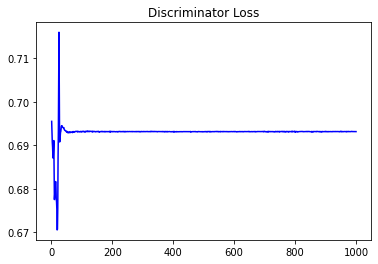

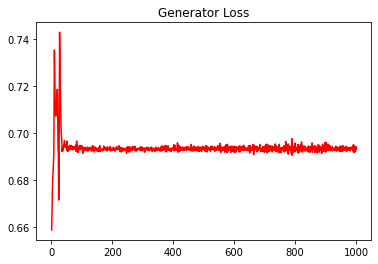

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.018114896861214234


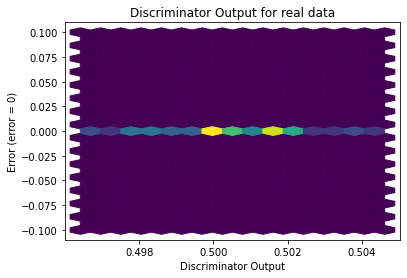

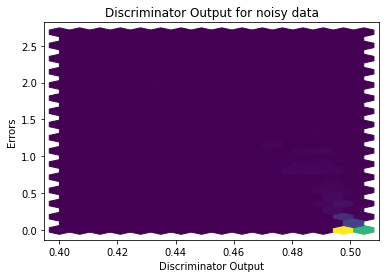

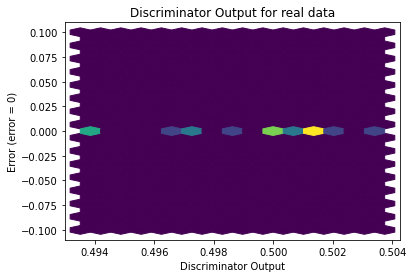

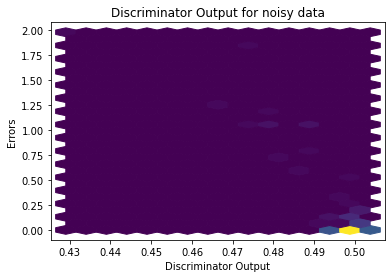

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


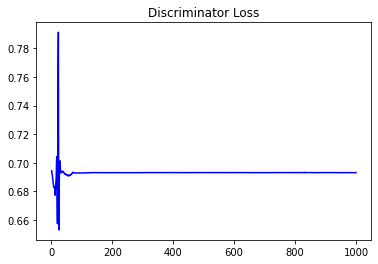

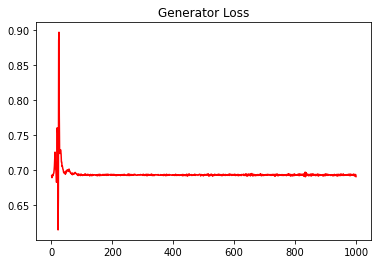

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.032355352705575074


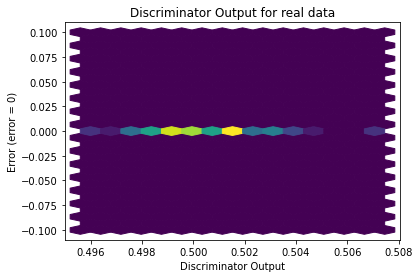

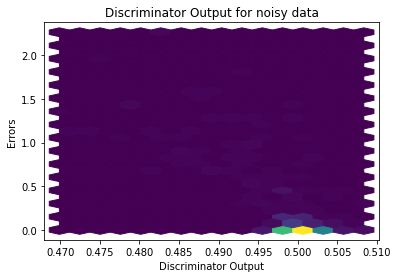

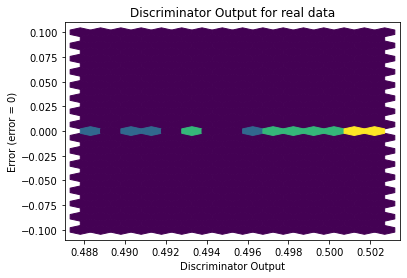

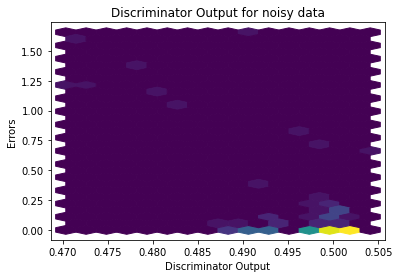

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5830]], requires_grad=True)
